In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.99250
1,2,71.51521,136.48730
2,3,69.39874,153.02690
3,4,68.21660,142.33540
4,5,67.78781,144.29710
5,6,68.69784,123.30240
6,7,69.80204,141.49470
7,8,70.01472,136.46230
8,9,67.90265,112.37230
9,10,66.78236,120.66720


In [234]:
df = df.drop(columns={"Index"})

In [235]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [236]:
df.tail()

,Height(Inches),Weight(Pounds)
25,67.20864,129.7244
26,70.84235,142.4235
27,67.49434,131.5502
28,66.53401,108.3324
29,65.44098,113.8922


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  30 non-null     float64
 1   Weight(Pounds)  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [238]:
df.describe()

,Height(Inches),Weight(Pounds)
count,30.000000,30.000000
mean,68.067946,129.453654
std,1.805908,13.244515
min,63.481150,97.901910
25%,67.120215,121.115850
50%,67.868220,129.613550
75%,68.833568,141.441200
max,71.515210,153.026900


In [239]:
df.dtypes

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

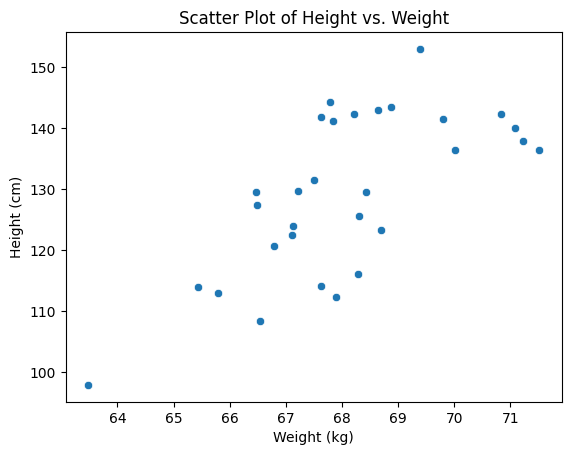

In [240]:
sns.scatterplot(x=df['Height(Inches)'], y=df['Weight(Pounds)'])
plt.title("Scatter Plot of Height vs. Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

In [241]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.686032
Weight(Pounds),0.686032,1.000000


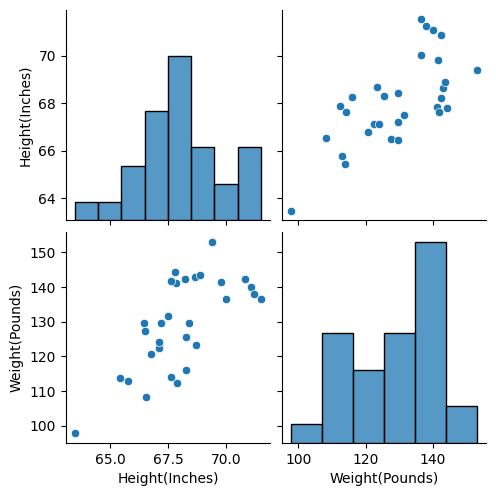

<Figure size 1200x600 with 0 Axes>

In [242]:
sns.pairplot(df)
plt.figure(figsize=(12,6))
plt.show()

## Dependent and Independent Features

NOTE : 
- Always the Independent Feature should be a DataFrame or a 2D array
- Always the Dependent Feature should be a Series

In [245]:
# Independent Feature
x = df['Height(Inches)']

In [246]:
type(x)

pandas.core.series.Series

In [247]:
x = df[['Height(Inches)']]

In [248]:
type(x)

pandas.core.frame.DataFrame

In [249]:
np.array(x).shape

(30, 1)

In [250]:
# Dependent Feature
y = df['Weight(Pounds)']

In [251]:
type(y)

pandas.core.series.Series

## Train Test Split

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [255]:
x_train.shape

(21, 1)

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[-1.16315474],
       [-0.13845566],
       [-0.81672006],
       [ 0.32675107],
       [-0.48159822],
       [-0.22253773],
       [-2.34001742],
       [ 1.76698876],
       [ 0.68505069],
       [-0.43452699],
       [ 0.0807415 ],
       [ 0.41926282],
       [ 1.42302317],
       [ 1.62135829],
       [-1.33815361],
       [-0.11495072],
       [ 0.99993926],
       [-0.80307615],
       [ 0.11298284],
       [-0.47412449],
       [ 0.89121738]])

In [258]:
x_test = scaler.transform(x_test)

In [259]:
x_test

array([[-0.28847733],
       [ 1.55043961],
       [ 0.18567539],
       [ 0.30192212],
       [-0.07974953],
       [-0.65244104],
       [-0.7793974 ],
       [-0.22012998],
       [ 0.1246433 ]])

## Simple Linear Regression

In [261]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [262]:
print("Coefficent/Slope ", regression.coef_)
print("Intercept ", regression.intercept_)

Coefficent/Slope  [4.94339134]
Intercept  -206.4046977551824


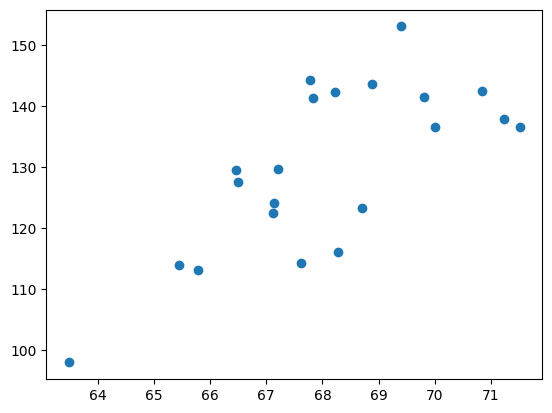

In [263]:
## plot Training data plot best fit line
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

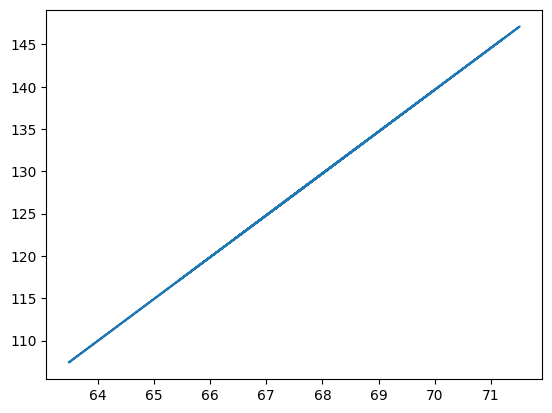

In [264]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(slope_of_best_fit)